In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Load the data

In [34]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')


Define features and target

In [35]:
# Extract relevant features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea']
target = 'SalePrice'

Handle missing values

In [36]:
# Handle missing values by dropping rows with missing values in the selected columns
train_data = train_data.dropna(subset=features + [target])
test_data = test_data.dropna(subset=features)

Preprocessing and Pipeline

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define numerical and categorical features
numerical_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'LotFrontage', 'LotArea']
categorical_features = ['MSSubClass', 'MSZoning']

# Define transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


Split Training Data and Train the Model

In [38]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = train_data[features]
y = train_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['GrLivArea', 'BedroomAbvGr',
                                                   'FullBath', 'LotFrontage',
                                                   'LotArea']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['MSSubClass',
                                                   'MSZoning'])])),
                ('model', LinearRegression())])

Evaluate the Model

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2168511164.329796
R-squared: 0.7580604542869214


Preprocess Test Data and Make Predictions

In [41]:
# Preprocess the test data (apply same preprocessing steps as for training data)
X_test_data = test_data[features]

# Make predictions on the test data
test_predictions = pipeline.predict(X_test_data)

# Create a DataFrame for the test predictions
submission = pd.DataFrame({
    'Id': test_data['Id'],  # Assuming 'Id' is a column in test_data
    'SalePrice': test_predictions
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)


Create Plots

Scatter Plot of Features vs. Target

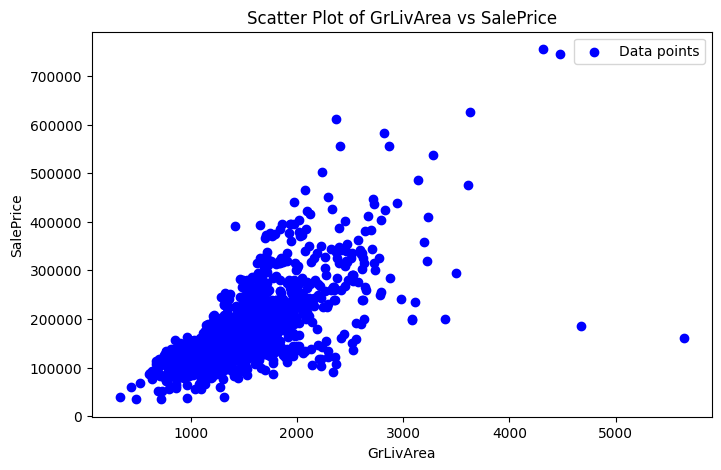

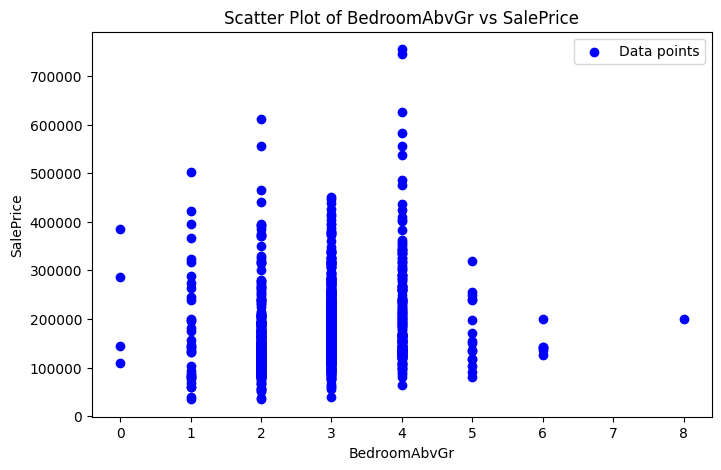

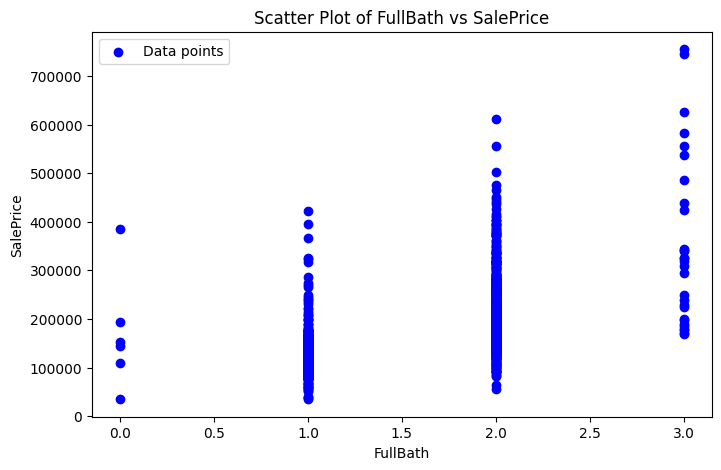

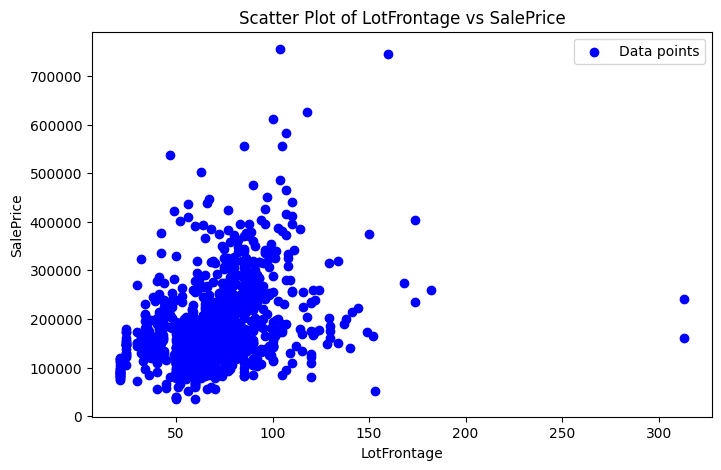

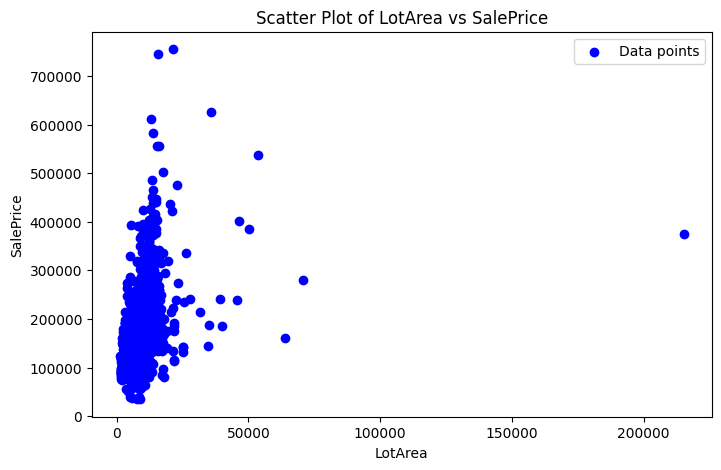

In [42]:
import matplotlib.pyplot as plt

# Plot scatter plots for each feature vs. the target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.scatter(train_data[feature], train_data[target], color='blue', label='Data points')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'Scatter Plot of {feature} vs {target}')
    plt.legend()
    plt.show()


Residual Plot


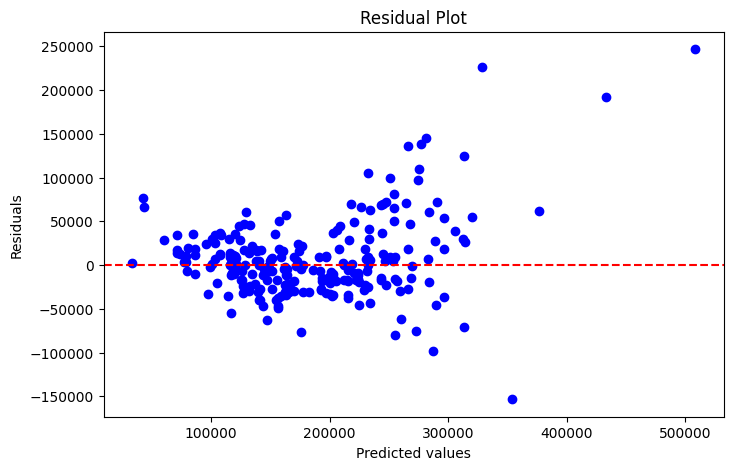

In [43]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Histogram of Residuals


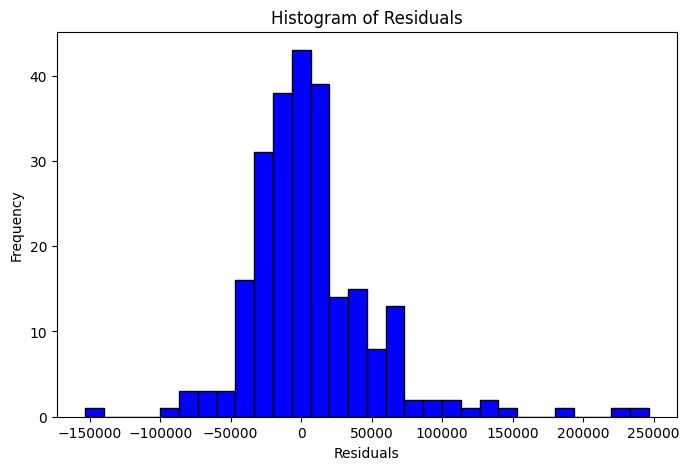

In [44]:
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


Q-Q Plot of Residuals


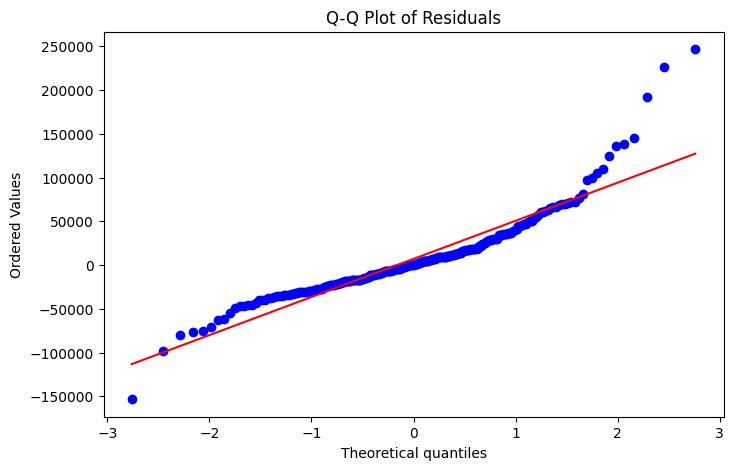

In [45]:
import scipy.stats as stats

plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


Actual vs. Predicted Values


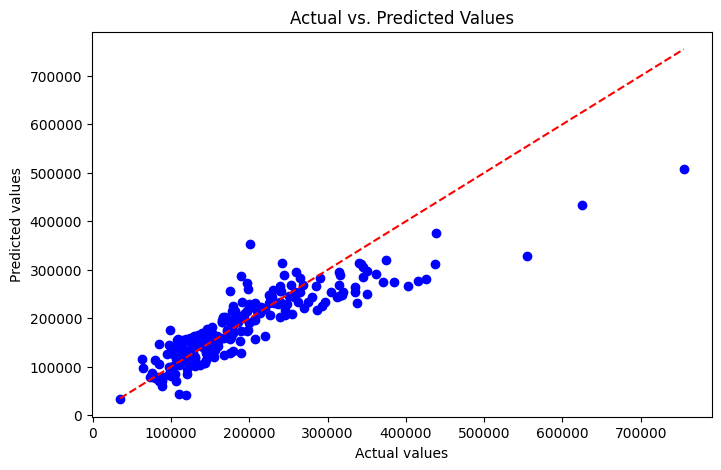

In [46]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.show()
